In [18]:
from model import *
import os # File/directory operations
import ntpath # File/directory operations
import matplotlib
import matplotlib.pyplot as plt
import imageio as imio # Reading images
import glob
from collections import Counter
import itertools
import collections

dataImPaths = {'XTrain':os.path.abspath(os.path.join('Data','Image','XTrain')),
             'XTest':os.path.abspath(os.path.join('Data','Image','XTest')),
             'yTrain':os.path.abspath(os.path.join('Data','Image','yTrain')),
             'yTest':os.path.abspath(os.path.join('Data','Image','yTest'))}

In [19]:
model = vgg_unet(43, 256, 416)

In [20]:
model.load_weights('Weights/vgg_unet_1.50-CE-Ex2-Fixed.h5')

In [25]:
imXTrain = glob.glob(os.path.join(dataImPaths['XTrain'], "*"))
imXTest = glob.glob(os.path.join(dataImPaths['XTest'], "*"))

imYTrain = glob.glob(os.path.join(dataImPaths['yTrain'], "*"))
imYTest = glob.glob(os.path.join(dataImPaths['yTest'], "*"))

filePairPathsTrain = list(zip(imXTrain, imYTrain))
filePairPathsTest = list(zip(imXTest, imYTest))


def getUniqueCountFormImage(imPath):
    img = np.unique(np.array(imPath).astype(np.uint16))
    return dict(zip(img,itertools.repeat(1)))

def addDicts(d1, d2):
    A = Counter(d1)
    B = Counter(d2)
    return dict(A + B)

def path_leaf(path):
    """This function gets the file name from a path"""
    head, tail = ntpath.split(path)
    return tail or ntpath.basename(head)

def reduceSSCNoise(y_pred,thresh=0.001):
    
    df = pd.DataFrame.from_dict(getUniqueCountFormImage(y_pred), orient='index').astype(float)
    div = df.iloc[:,0].values.sum()
    df = df.apply(lambda r: r/div, axis=1)
    dfout = df.to_dict()[0]
    dfout = { k:v for k, v in dfout.items() if v > thresh }
    return np.array(list(dfout.keys()))

def getClassFromID(id):
    data = pd.read_csv('Data/classes.csv')
    return data.loc[data['_id'] == id, '_name'].values[0]

In [26]:
testPairs = {}
for im in filePairPathsTest:
    #out = model.predict_segmentation(inp=im[0],out_fname=path_leaf(im[1]))
    out = model.predict_segmentation(inp=im[0])
    
    true = imio.imread(im[1])
    
    uniqueTrue = reduceSSCNoise(true,0)
    uniquePred = reduceSSCNoise(out)
    
    
    uniqueTrue.sort()
    uniquePred.sort()
    
    testPairs[path_leaf(im[0])] = {
        'yTest':uniqueTrue,
        'yPred':uniquePred
    }
    
    #print(path_leaf(im[1]))
    #print([getClassFromID(x) for x in testPairs[path_leaf(im[0])]['yTest']])
    #print(path_leaf(im[0]))
    #print([getClassFromID(x) for x in testPairs[path_leaf(im[0])]['yPred']])
    print(SSC(true,reduceSSCNoise(out)))
    #print('\n')

0.8461538461538461
1.0
0.7647058823529411
1.0
0.4117647058823529
0.7333333333333333
0.75
1.0


1001a.png


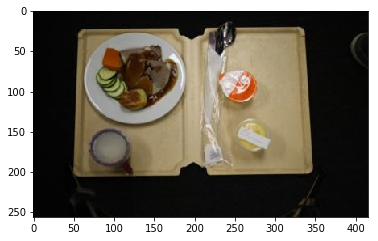

['background', 'tray', 'cutlery', 'roast lamb', 'gravy', 'zucchini', 'pumpkin', 'jacket potato', 'soup', 'custard', 'juice']
['background', 'tray', 'cutlery', 'roast lamb', 'gravy', 'zucchini', 'pumpkin', 'jacket potato', 'soup', 'custard', 'juice', 'orange juice']
1006a.png


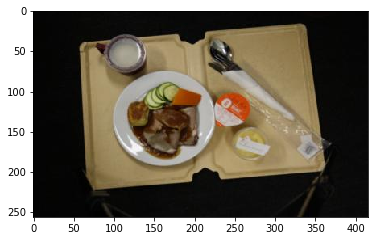

['background', 'tray', 'cutlery', 'roast lamb', 'gravy', 'zucchini', 'pumpkin', 'jacket potato', 'soup', 'custard', 'orange juice']
['background', 'tray', 'cutlery', 'roast lamb', 'gravy', 'zucchini', 'pumpkin', 'jacket potato', 'soup', 'custard', 'orange juice']
2001a.png


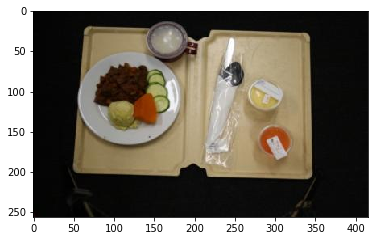

['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'creamed potato', 'soup', 'jelly', 'custard']
['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'creamed potato', 'soup', 'jelly', 'custard']
2003a.png


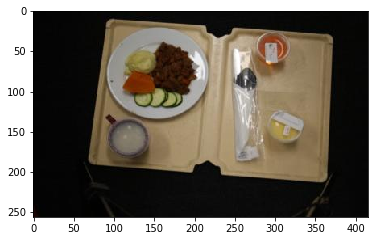

['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'creamed potato', 'soup', 'jelly', 'custard']
['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'creamed potato', 'soup', 'jelly', 'custard']
3001a.png


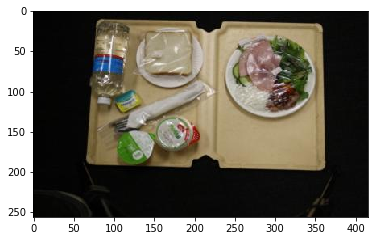

['background', 'tray', 'cutlery', 'ham', 'bean', 'cucumber', 'leaf', 'tomato', 'boiled rice', 'bread', 'margarine', 'canned fruit', 'juice', 'water']
['background', 'tray', 'cutlery', 'ham', 'bean', 'cucumber', 'leaf', 'tomato', 'boiled rice', 'bread', 'margarine', 'canned fruit', 'juice', 'water']
4001a.png


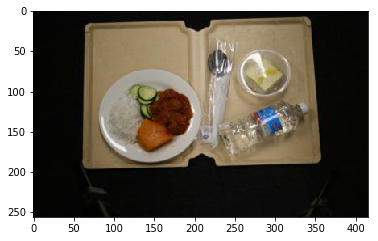

['background', 'tray', 'cutlery', 'boiled rice', 'beef mexican meatballs', 'zucchini', 'pumpkin', 'lemon sponge', 'water']
['background', 'tray', 'cutlery', 'boiled rice', 'beef mexican meatballs', 'zucchini', 'pumpkin', 'lemon sponge', 'water']
4002a.png


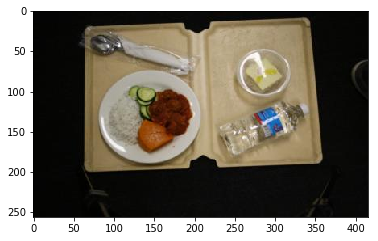

['background', 'tray', 'cutlery', 'boiled rice', 'beef mexican meatballs', 'zucchini', 'pumpkin', 'lemon sponge', 'water']
['background', 'tray', 'cutlery', 'boiled rice', 'beef mexican meatballs', 'zucchini', 'pumpkin', 'lemon sponge', 'water']
5001a.png


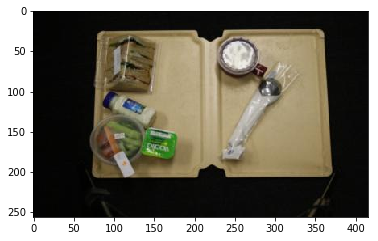

['background', 'tray', 'cutlery', 'sandwich', 'side salad', 'soup', 'milk', 'vanilla yogurt']
['background', 'tray', 'cutlery', 'sandwich', 'side salad', 'soup', 'milk', 'vanilla yogurt']
5007a.png


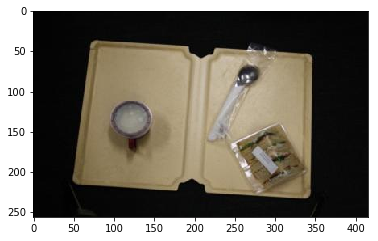

['background', 'tray', 'cutlery', 'sandwich', 'soup']
['background', 'tray', 'cutlery', 'sandwich', 'soup']
6001a.png


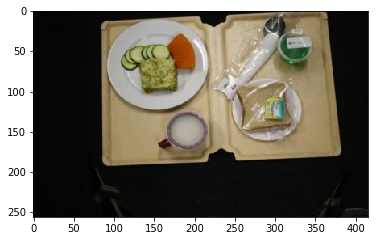

['background', 'tray', 'cutlery', 'spinach and pumpkin risotto', 'zucchini', 'pumpkin', 'bread', 'margarine', 'soup', 'jelly']
['background', 'tray', 'cutlery', 'spinach and pumpkin risotto', 'baked fish', 'zucchini', 'pumpkin', 'bread', 'margarine', 'soup', 'jelly']
6010a.png


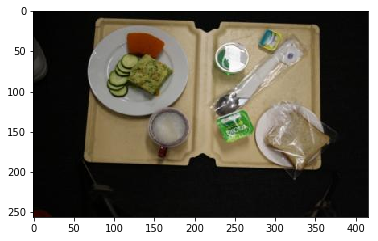

['background', 'tray', 'cutlery', 'spinach and pumpkin risotto', 'zucchini', 'pumpkin', 'bread', 'margarine', 'soup', 'vanilla yogurt', 'jelly']
['background', 'tray', 'cutlery', 'spinach and pumpkin risotto', 'zucchini', 'pumpkin', 'bread', 'margarine', 'soup', 'vanilla yogurt', 'jelly']
7001a.png


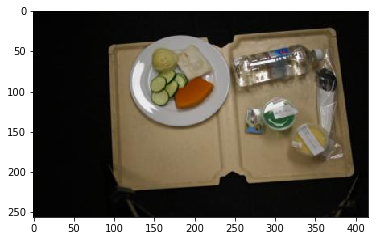

['background', 'tray', 'cutlery', 'baked fish', 'zucchini', 'pumpkin', 'tartare sauce', 'creamed potato', 'jelly', 'custard', 'water']
['background', 'tray', 'cutlery', 'baked fish', 'zucchini', 'pumpkin', 'tartare sauce', 'creamed potato', 'jelly', 'custard', 'water']
7004a.png


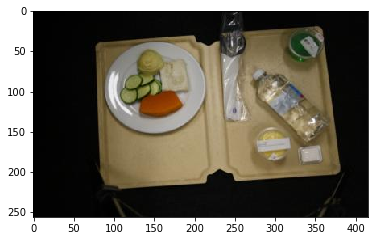

['background', 'tray', 'cutlery', 'baked fish', 'zucchini', 'pumpkin', 'tartare sauce', 'creamed potato', 'jelly', 'custard', 'water']
['background', 'tray', 'cutlery', 'baked fish', 'zucchini', 'pumpkin', 'tartare sauce', 'creamed potato', 'jelly', 'custard', 'water']
8001a.png


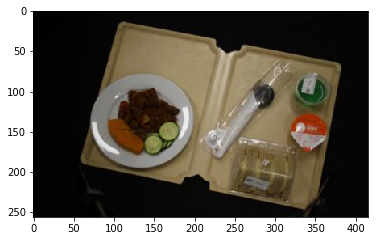

['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'sandwich', 'jelly', 'orange juice']
['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'sandwich', 'jelly', 'orange juice']
8005a.png


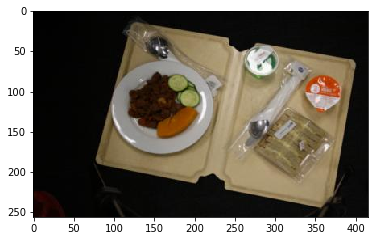

['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'sandwich', 'jelly', 'orange juice']
['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'sandwich', 'jelly', 'orange juice']
8007a.png


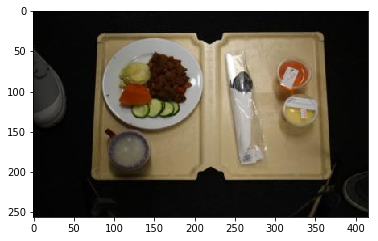

['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'creamed potato', 'soup', 'jelly', 'custard']
['background', 'tray', 'cutlery', 'beef tomato casserole', 'zucchini', 'pumpkin', 'creamed potato', 'soup', 'jelly', 'custard', 'orange juice']


In [28]:
testPairs = {}
for im, real in zip(filePairPathsTrain, imXTrain):
    #out = model.predict_segmentation(inp=im[0],out_fname=path_leaf(im[1]))
    out = model.predict_segmentation(inp=im[0])
    true = imio.imread(im[1])
    
    uniqueTrue = reduceSSCNoise(true,0)
    uniquePred = reduceSSCNoise(out)
    
    
    uniqueTrue.sort()
    uniquePred.sort()
    
    testPairs[path_leaf(im[0])] = {
        'yTest':uniqueTrue,
        'yPred':uniquePred
    }
    
    print(path_leaf(im[1]))
    plt.imshow(imio.imread(real))
    plt.show()
    print([getClassFromID(x) for x in testPairs[path_leaf(im[0])]['yTest']])
    #print(path_leaf(im[0]))
    print([getClassFromID(x) for x in testPairs[path_leaf(im[0])]['yPred']])
    #print(SSC(true,reduceSSCNoise(out)))
    #print('\n')

In [ ]:
getClassFromID(0)

In [23]:
imYTrain = glob.glob(os.path.join(dataImPaths['yTrain'], "*"))
imYTest = glob.glob(os.path.join(dataImPaths['yTest'], "*"))

In [10]:
trainDist = {}
for image in imYTrain:
    imDist = getUniqueCountFormImage(image)
    print(imDist)
    trainDist = addDicts(trainDist, imDist)
    
trainDist = dict(collections.OrderedDict(sorted(trainDist.items())))

testDist = {}
for image in imYTest:
    imDist = getUniqueCountFormImage(image)
    testDist = addDicts(testDist, imDist)
    
testDist = dict(collections.OrderedDict(sorted(testDist.items())))


{0: 1, 1: 1, 2: 1, 7: 1, 18: 1, 19: 1, 22: 1, 27: 1, 31: 1, 37: 1, 39: 1}
{0: 1, 1: 1, 2: 1, 7: 1, 18: 1, 19: 1, 22: 1, 27: 1, 31: 1, 37: 1, 41: 1}
{0: 1, 1: 1, 2: 1, 8: 1, 19: 1, 22: 1, 28: 1, 31: 1, 36: 1, 37: 1}
{0: 1, 1: 1, 2: 1, 8: 1, 19: 1, 22: 1, 28: 1, 31: 1, 36: 1, 37: 1}
{0: 1, 1: 1, 2: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 29: 1, 30: 1, 33: 1, 39: 1, 42: 1}
{0: 1, 1: 1, 2: 1, 14: 1, 15: 1, 19: 1, 22: 1, 38: 1, 42: 1}
{0: 1, 1: 1, 2: 1, 14: 1, 15: 1, 19: 1, 22: 1, 38: 1, 42: 1}
{0: 1, 1: 1, 2: 1, 24: 1, 25: 1, 31: 1, 34: 1, 35: 1}
{0: 1, 1: 1, 2: 1, 24: 1, 31: 1}
{0: 1, 1: 1, 2: 1, 16: 1, 19: 1, 22: 1, 29: 1, 30: 1, 31: 1, 36: 1}
{0: 1, 1: 1, 2: 1, 16: 1, 19: 1, 22: 1, 29: 1, 30: 1, 31: 1, 35: 1, 36: 1}
{0: 1, 1: 1, 2: 1, 17: 1, 19: 1, 22: 1, 26: 1, 28: 1, 36: 1, 37: 1, 42: 1}
{0: 1, 1: 1, 2: 1, 17: 1, 19: 1, 22: 1, 26: 1, 28: 1, 36: 1, 37: 1, 42: 1}
{0: 1, 1: 1, 2: 1, 8: 1, 19: 1, 22: 1, 24: 1, 36: 1, 41: 1}
{0: 1, 1: 1, 2: 1, 8: 1, 19: 1, 22: 1, 24: 1, 36: 1, 41: 1}
{

In [ ]:
matplotlib.rcParams['figure.figsize'] = [14, 5]

df = pd.DataFrame.from_dict(trainDist, orient='index').astype(float)
df1 = pd.DataFrame.from_dict(testDist, orient='index').astype(float)

plt.bar(list(df.index),list(df.iloc[:,0]),alpha = 0.5, label='Train')
plt.bar(list(df1.index),list(df1.iloc[:,0]),alpha = 0.5, label='Test')
plt.xticks(range(0,43))
# x-axis label 
plt.xlabel('class') 
# y-axis label 
plt.ylabel('# of occurrences') 
# Legend
plt.legend(title="Dataset",loc=1)
# show the plot
plt.show()